In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dataframe = pd.read_csv('userdb.csv')
print(dataframe.iloc[:,:len(dataframe)+1])
x = dataframe.iloc[:,0:9].values
print(x)

     AIML  Appdev  Books  Competitive programming  Gaming  Gen-z homour  \
0       0       1      1                        0       0             1   
1       0       1      0                        0       0             0   
2       1       1      1                        0       1             0   
3       1       1      0                        1       0             0   
4       0       0      0                        1       1             1   
..    ...     ...    ...                      ...     ...           ...   
96      1       1      0                        0       1             0   
97      0       1      1                        1       1             0   
98      0       1      0                        1       1             1   
99      0       1      1                        0       0             0   
100     0       1      1                        1       0             0   

     Music  Normal humour  Webdev  cluster     name  
0        1              1       1        0   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

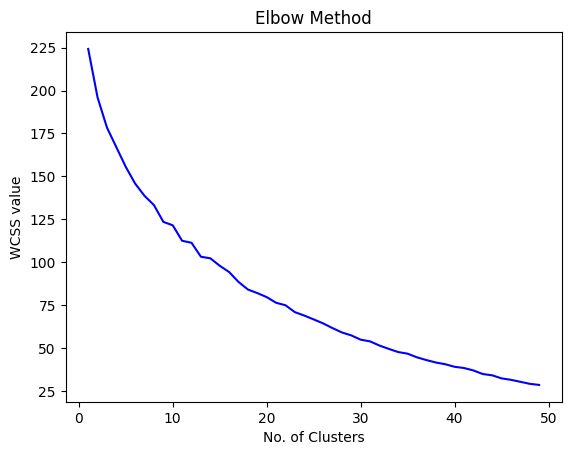

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50), wcss, color = 'blue')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS value')
plt.show()

In [13]:
kno = 16
kmeans = KMeans(n_clusters = kno, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)
print(len(y_kmeans))

[ 7  2 15  0 12  9  0 10 11  3 13  9  1  8  0  8  3  0 15  8  6  2  1  1
  9  9  6  2  2  2  2 12  5 11  9  0 14  4  8 13  1  7 15  4 13  3 11 10
 12 11 10 15 12  2 11 13  4  1  1  4  9 11 10 14  5  0  1  0  1 13  4  2
  5  5 12  5 15  4  9  7  0  8 12  7  4  1  7  6  5 15  4  6 12  4  1  6
  3 13 12  5  5]
101


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
lists = []
for i in range(kno):
    listt = []
    boolt = (y_kmeans == i)
    c = 0
    for j in boolt:
        if j:
            listt.append(dataframe['name'].iloc[c])
            dataframe['cluster'].iloc[c] = i
        c+=1
    lists.append(listt)
for i in lists:
    print(i)
print()
print(dataframe)

['100!com', '13!com', '20!com', '23!com', '4!com', '67!com', '69!com', '80!com']
['19!com', '28!com', '29!com', '44!com', '6!com', '60!com', '68!com', '7!com', '85!com', '93!com']
['1!com', '27!com', '32!com', '33!com', '34!com', '35!com', '56!com', '72!com']
['16!com', '22!com', '49!com', '95!com']
['41!com', '47!com', '59!com', '61!com', '71!com', '78!com', '84!com', '9!com', '92!com']
['37!com', '66!com', '73!com', '74!com', '76!com', '88!com', '98!com', '99!com']
['26!com', '31!com', '87!com', '90!com', '94!com']
['0!com', '45!com', '8!com', '83!com', '86!com']
['2!com', '21!com', '25!com', '42!com', '81!com']
['12!com', '18!com', '3!com', '30!com', '39!com', '62!com', '79!com']
['14!com', '50!com', '53!com', '64!com']
['15!com', '38!com', '5!com', '52!com', '57!com', '63!com']
['11!com', '36!com', '51!com', '55!com', '75!com', '82!com', '91!com', '97!com']
['17!com', '43!com', '48!com', '58!com', '70!com', '96!com']
['40!com', '65!com']
['10!com', '24!com', '46!com', '54!com', '77

<ipython-input-14-662bc2cdda57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['cluster'].iloc[c] = i


In [15]:
dataframe.to_csv('new.csv',index=False,header=True,encoding='utf-8')

In [16]:
centroids = kmeans.cluster_centers_
centroids = np.array(centroids)
col_headings = ['x0','x1','x2','x3','x4','x5','x6','x7','x8']
centroid_df = pd.DataFrame(centroids, columns = col_headings)
print(centroid_df)

          x0            x1        x2        x3        x4        x5        x6  \
0   0.875000  1.000000e+00  0.125000  0.625000  0.750000  0.500000  0.875000   
1   0.200000 -5.551115e-17  0.700000  0.400000  0.100000  0.100000  1.000000   
2   0.125000  2.500000e-01  0.750000  0.375000  0.000000  0.000000  0.000000   
3   1.000000  1.000000e+00  0.500000  0.500000  1.000000  0.000000  1.000000   
4   0.777778  1.111111e-01  0.888889  0.555556  0.222222  0.777778  0.111111   
5   0.125000  1.000000e+00  0.875000  0.750000  0.125000  0.625000  0.250000   
6   1.000000 -5.551115e-17  0.000000  0.800000  0.800000  1.000000  0.800000   
7   0.200000  1.000000e+00  0.600000  0.000000  0.200000  0.800000  0.800000   
8   1.000000  8.000000e-01  1.000000  0.000000  1.000000  1.000000  0.600000   
9   0.000000  0.000000e+00  0.857143  1.000000  0.285714  1.000000  0.571429   
10  0.500000  0.000000e+00  0.000000  0.000000  0.250000  0.000000  1.000000   
11  0.500000  0.000000e+00  0.333333  1.

In [17]:
user = [1,1,1,1,1,0,1,0,0]
distance = []
clus_array = [i for i in range(kno)]
for i in range(kno):
    l = []
    for j in range(9):
        dist = (user[j]-centroid_df.iloc[[i],[j]].values)**2
        l.append(dist)
    dis = sum(l)
    distance.append(float(dis))
print(distance)
for i in range(kno-1):
    for j in range(kno-i-1):
        if(distance[j]>distance[j+1]):
            distance[j], distance[j+1] = distance[j+1], distance[j]
            clus_array[j], clus_array[j+1] = clus_array[j+1], clus_array[j]
print(clus_array)
print(distance)

[1.25, 3.7199999999999998, 4.171875, 2.5, 3.0617283950617282, 4.09375, 4.16, 5.120000000000001, 2.6, 5.224489795918367, 5.375, 3.5277777777777777, 4.515625, 2.111111111111111, 5.5, 3.222222222222222]
[0, 13, 3, 8, 4, 15, 11, 1, 5, 6, 2, 12, 7, 9, 10, 14]
[1.25, 2.111111111111111, 2.5, 2.6, 3.0617283950617282, 3.222222222222222, 3.5277777777777777, 3.7199999999999998, 4.09375, 4.16, 4.171875, 4.515625, 5.120000000000001, 5.224489795918367, 5.375, 5.5]
